### **Regression Discontinuity Analysis on Bank-Debits**

#### **Project Description**

*Which Debts Are Worth the Bank's Effort?*
*After a debt has been legally declared "uncollectable" by a bank, the account is considered to be "charged-off." But that doesn't mean the bank simply walks away from the debt. They still want to collect some of the money they are owed. In this project, you will look at a situation where a bank assigned delinquent customers to different recovery strategies based on the expected amount the bank believed it would recover from the customer. The goal for the data scientist is to determine in this non-random assignment whether the incremental amount the bank earns exceeded the additional cost of assigning customers to a higher recovery strategy.
Threshold assignments like this also one occur in medicine (above a certain temperature you get medicine), education (above a certain test score students get admitted to a special class), other areas of finance (above a certain wealth customers get different levels of service), and public sector (below a certain income someone is eligible for housing benefits). Regression discontinuity is an intuitive and useful analysis method in any situation of a threshold assignment.*

**The goal for the data scientist is to determine in this non-random assignment whether the incremental amount the bank earns exceeded the additional cost of assigning customers to a higher recovery strategy.**

**Regression discontinuity: banking recovery**

*After a debt has been legally declared "uncollectable" by a bank, the account is considered to be "charged-off." But that doesn't mean the bank simply walks away from the debt. They still want to collect some of the money they are owed. The bank will score the account to assess the expected recovery amount, that is, the expected amount that the bank may be able to receive from the customer in the future (for a fixed time period such as one year). This amount is a function of the probability of the customer paying, the total debt, and other factors that impact the ability and willingness to pay.*

*The bank has implemented different recovery strategies at different thresholds ($1000, $2000, etc.) where the greater the expected recovery amount, the more effort the bank puts into contacting the customer. For low recovery amounts (Level 0), the bank just adds the customer's contact information to their automatic dialer and emailing system. For higher recovery strategies, the bank incurs more costs as they leverage human resources in more efforts to contact the customer and obtain payments. Each additional level of recovery strategy requires an additional $50 per customer so that customers in the Recovery Strategy Level 1 cost the company $50 more than those in Level 0. Customers in Level 2 cost $50 more than those in Level 1, etc*

*The big question: does the extra amount that is recovered at the higher strategy level exceed the extra $50 in costs? In other words, was there a jump (also called a "discontinuity") of more than $50 in the amount recovered at the higher strategy level?*

In [1]:
# Import necessary libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Importing modules for data preprocessing and model evaluation

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Importing regression models for comparison

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Suppressing unnecessary warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
df = pd.read_csv('bank_data.csv')

In [3]:
df

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


In [5]:
# Printing concise information about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


### **Exploratory Data Analysis (EDA)**

**Univariate Analysis**

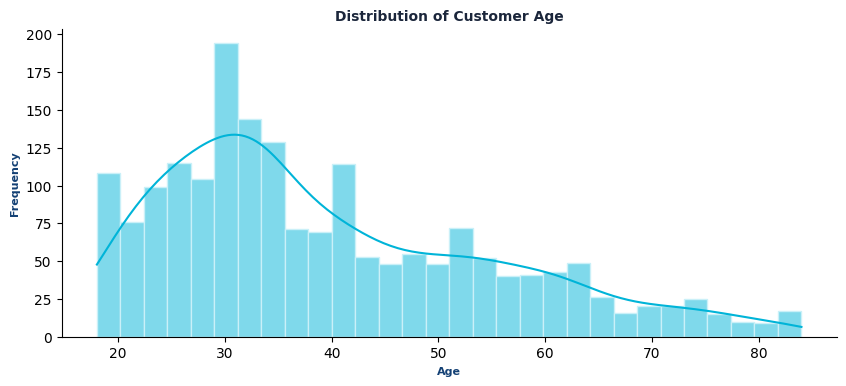

In [4]:
# Creating a histogram to visualize the distribution of customer age

plt.figure(figsize=(10, 4))
sns.histplot(x='age', data=df, kde=True, bins=30, color='#00b4d8', edgecolor='#caf0f8')

plt.title('Distribution of Customer Age', fontdict={'weight': 'bold', 'fontsize': 10, 'color': '#1b263b'})
plt.xlabel('Age', fontdict={'weight': 'bold', 'fontsize': 8, 'color': '#134074'})
plt.ylabel('Frequency', fontdict={'weight': 'bold', 'fontsize': 8, 'color': '#134074'})
sns.despine()
plt.show()

*The Analysis of the Customer age distribution reveals a left-skewed histogram, indicating that a significant proportion of customers fall within the age range of 20 and 43*

*This concentration suggest a predominant presence of younger customers*

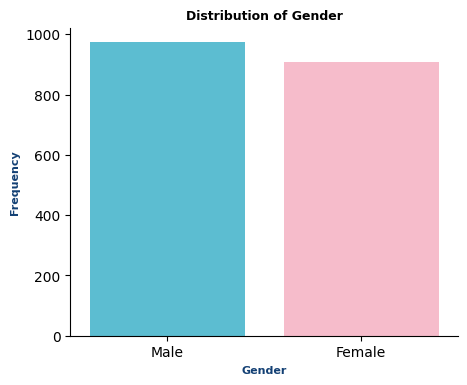

In [58]:
# Visualizing the distribution of customers by Gender.
plt.figure(figsize=(5,4))

sns.countplot(x='sex', data=df, palette=['#48cae4', '#ffb3c6'])
plt.title('Distribution of Gender', fontdict={'fontsize' : 9, 'weight' : 'bold'})
plt.xlabel('Gender', fontdict={'weight': 'bold', 'fontsize': 8, 'color': '#134074'})
plt.ylabel('Frequency', fontdict={'weight': 'bold', 'fontsize': 8, 'color': '#134074'})
sns.despine()
plt.show()

### **Graphical Exploratory Data Analysis**

### **Statistical Test- Age vs. Expected Recovery Amount**

##### **Bivariate Analysis**

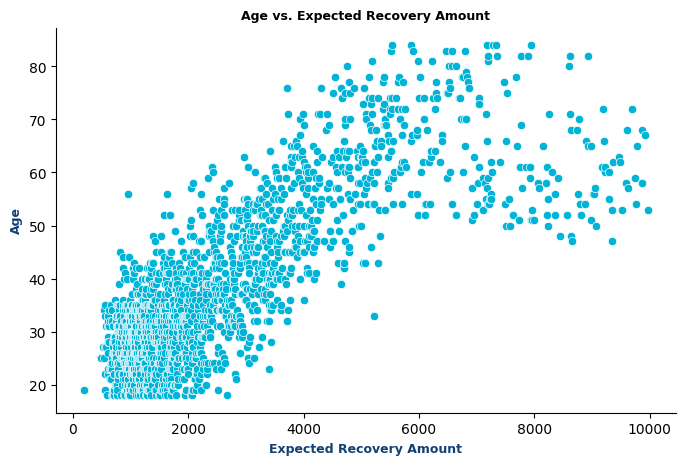

In [10]:
# Scatter Plot of Age vs. Expected Recovery Amount

plt.figure(figsize=(8, 5))
sns.scatterplot(x='expected_recovery_amount', y='age', data=df, color='#00b4d8')

plt.title('Age vs. Expected Recovery Amount', fontdict={'fontsize' : 9, 'weight' : 'bold'})
plt.xlabel('Expected Recovery Amount', fontdict={'weight': 'bold', 'fontsize': 9, 'color': '#134074'})
plt.ylabel('Age', fontdict={'weight': 'bold', 'fontsize': 9, 'color': '#134074'})
sns.despine()
plt.show()


**Conclusion:**
*The scatter plot illustrates the relationship between customer age and the expected recovery amount. While no clear linear pattern is evident, the concentration of points in certain age brackets suggests potential variations in expected recovery amounts among different age groups.*

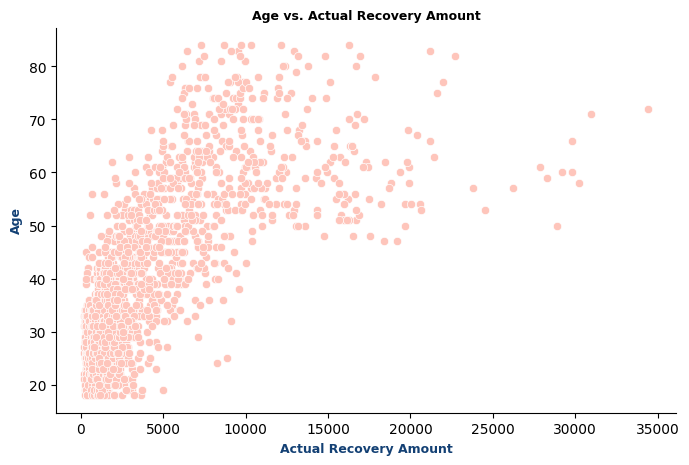

In [11]:
# Scatter Plot of Age vs. Actual Recovery Amount

plt.figure(figsize=(8, 5))
sns.scatterplot(x='actual_recovery_amount', y='age', data=df, color='#fec5bb')

plt.title('Age vs. Actual Recovery Amount', fontdict={'fontsize' : 9, 'weight' : 'bold'})
plt.xlabel('Actual Recovery Amount', fontdict={'weight': 'bold', 'fontsize': 9, 'color': '#134074'})
plt.ylabel('Age', fontdict={'weight': 'bold', 'fontsize': 9, 'color': '#134074'})
sns.despine()
plt.show()


*We want to convince ourselves that variables such as age and sex are similar above and below the $1000 Expected Recovery Amount threshold. This is important because we want to be able to conclude that differences in the actual recovery amount are due to the higher Recovery Strategy and not due to some other difference like age or sex.*

*The null hypothesis : No difference in the customers avg age and the expected recovery amounts just above or below $1000:*

In [12]:
# Check if the average age differs significantly just above and just below the $1000 threshold.

from scipy.stats import ttest_ind

# Seperating the data above and below the $1000 threshold
above_threshold = df[df['expected_recovery_amount'] > 1000]['age']
below_threshold = df[df['expected_recovery_amount'] <= 1000]['age']

# Perform a t-test
t_stat, p_value = ttest_ind(above_threshold, below_threshold)

print(f"T-Statistic : {t_stat}\n P-Value: {p_value}")


T-Statistic : 13.759810322222169
 P-Value: 4.07177857839181e-41


*The ttest_ind function from the scipy.stats module is used when you want to perform an independent two-sample t-test. This test is appropriate when you have two independent groups and you want to assess whether there is a significant difference between their means.*

*The t-statistic measures the difference between the means of the two groups relative to the spread of data points in each group.* 

*The p-value indicates the probability of observing such a t-statistic if the null hypothesis (no difference between group means) is true.*

**Conclusion**

**As we have got the very low p-value, we reject the null hypothesis**

**There is a significant difference in the average age of customers just above and below the $1000 threshold**

### **Statistical Test - Sex vs. Expected Recovery Amount**

*We were able to convince ourselves that there is no major jump in the male customer just above and just below the $1000 threshold by doing a statistical test as well as exploring it graphically with a scatter plot.*

*Ho : There is no association between gender and the likelihood of expected recovery amount above or below $1000*

In [14]:
# Check if the percentage of male customers differs significantly just above and just below the $1000 threshold.

from scipy.stats import chi2_contingency

# Creating a contingency df
contingency_df = pd.crosstab(df['sex'], df['expected_recovery_amount'] > 1000)

# Perform a chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_df)

print(f'Chi-Square Statistic: {chi2_stat}\nP-Value: {p_value}')

Chi-Square Statistic: 2.1768676619404688
P-Value: 0.14009934427173568


Interpretation of the Results:
Chi-Square Statistic: This statistic tests the independence of the two categorical variables (Sex and Expected Recovery Amount > $1000). A larger chi-square statistic suggests a stronger association between the variables.

P-Value: The p-value associated with the chi-square statistic measures the probability of observing the observed association between gender and expected recovery amount by random chance alone. A low p-value typically leads to rejecting the null hypothesis.

**Interpretation:**

*With a p-value of 0.14, the result is not statistically significant at a typical significance level (such as 0.05). Therefore, you would not reject the null hypothesis, suggesting that the percentage of male customers differs significantly just above and just below the $1000 threshold.*

### **Exploratory graphical analysis: recovery amount**

*A first step in examining the relationship between the actual recovery amount and the expected recovery amount is to develop a scatter plot where we want to focus our attention at the range just below and just above the threshold. Specifically, we will develop a scatter plot of Expected Recovery Amount (Y) vs. Actual Recovery Amount (X) for Expected Recovery Amounts between $900 to $1100. This range covers Levels 0 and 1. A key question is whether or not we see a discontinuity (jump) around the $1000 threshold.*

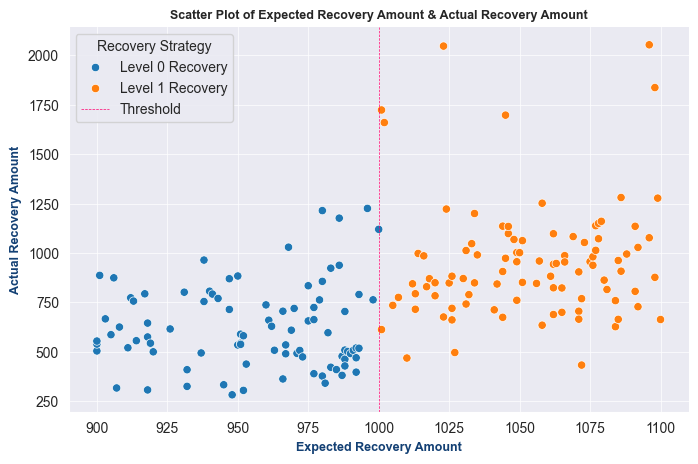

In [18]:
# Scatter plot of Expected Recovery Amount (Y) vs. Actual Recovery Amount(x)

# Filtering the data
threshold_range = (900, 1100)
filtered_df = df[(df['expected_recovery_amount'] >= threshold_range[0]) & (df['expected_recovery_amount'] <= threshold_range[1])]

# Creating a scatter plot

plt.figure(figsize=(8, 5))
sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount', data=filtered_df, hue='recovery_strategy')

plt.axvline(x=1000, color='#ff006e', linestyle='--', linewidth=0.5, label='Threshold')

plt.title('Scatter Plot of Expected Recovery Amount & Actual Recovery Amount', fontdict={'fontsize' : 9, 'weight' : 'bold'})
plt.xlabel('Expected Recovery Amount', fontdict={'weight': 'bold', 'fontsize': 9, 'color': '#134074'})
plt.ylabel('Actual Recovery Amount', fontdict={'weight': 'bold', 'fontsize': 9, 'color': '#134074'})
plt.legend(title='Recovery Strategy')

plt.grid(True, alpha=0.7)
sns.set_style('darkgrid')
sns.despine()
plt.show()

### **Statistical Analysis: Recovery Amount**

*Just as we did with age, we can perform statistical tests to see if the actual recovery amount has a discontinuity above the $1000 threshold. We are going to do this for two different windows of the expected recovery amount $900 to $1100 and for a narrow range of $950 to $1050 to see if our results are consistent.
Again, the statistical test we will use is the Kruskal-Wallis test, a test that makes no assumptions about the distribution of the actual recovery amount.*

In [4]:
# Performing the Kruskal-Wallis test for the actual recovery amount in two different windows of expected recovery amount.

from scipy.stats import kruskal

# define the two windows of expected recovery amounts
window1 = (900, 1100)
window2 = (950, 1050)

# Filtering the data for each window
df_window1 = df[(df['expected_recovery_amount'] >= window1[0]) & (df['expected_recovery_amount'] <= window1[1])]['actual_recovery_amount']
df_window2 = df[(df['expected_recovery_amount'] >= window2[0]) & (df['expected_recovery_amount'] <= window2[1])]['actual_recovery_amount']

# Perform Kruskal-Wallis test

stats, p_value = kruskal(df_window1, df_window2)

# Print the results
print(f'Kruskal-Wallis Statistic: {stats}\nP-Value: {p_value}')

# Check significance based on p-value (common significance level is 0.05)

if p_value < 0.05:
    print('The difference is statistically significant.')
else:
    print('There is no significant difference.')


Kruskal-Wallis Statistic: 0.823820206138487
P-Value: 0.36406558976551284
There is no significant difference.


*Since the p-value (0.364) is greater than the commonly chosen significance level of 0.05, we fail to reject the null hypothesis. The result suggests that there is no significant difference in the actual recovery amounts between the two windows of expected recovery amounts ($900 to $1100 and $950 to $1050). In other words, we do not have sufficient evidence to conclude that there is a discontinuity in actual recovery amounts at the $1000 threshold.*

### **Regression modeling: Without threshold**

In [6]:
# Separating feature and target variable from the DataFrame

x = df.drop(columns=['id', 'actual_recovery_amount'])
y = df['actual_recovery_amount']

In [7]:
obj_cols = x.select_dtypes(include='object').columns

In [8]:
# Initializing and applying label encoder for encoding categorical features.

encoder = LabelEncoder()

for col in obj_cols:
    x[col] = encoder.fit_transform(x[col])

In [9]:
# Split the data into Training and Testing sets

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=4)

In [10]:
# Build and train the linear regression model

model_lnr_1 = LinearRegression()

model_lnr_1.fit(xtrain, ytrain)

# Make the predictions on the training and testing set
train_pred_lnr = model_lnr_1.predict(xtrain)
test_pred_lnr = model_lnr_1.predict(xtest)

# Evaluate the Model
mae_train_lnr = metrics.mean_absolute_error(ytrain, train_pred_lnr)
mae_test_lnr = metrics.mean_absolute_error(ytest, test_pred_lnr)

mse_train_lnr = metrics.mean_squared_error(ytrain, train_pred_lnr)
mse_test_lnr = metrics.mean_squared_error(ytest, test_pred_lnr)

r2_train_lnr = metrics.r2_score(ytrain, train_pred_lnr)
r2_test_lnr = metrics.r2_score(ytest, test_pred_lnr)

print('Model Evaluation on Training set\n')
print(f'The Mean Absolute Error : {mae_train_lnr}')
print(f'The Mean Square Error : {mse_train_lnr}')
print(f'The R2 Score : {r2_train_lnr}\n')

print('Model Evaluation on Testing set\n')
print(f'The Mean Absolute Error : {mae_test_lnr}')
print(f'The Mean Square Error : {mse_test_lnr}')
print(f'The R2 Score : {r2_test_lnr}')



Model Evaluation on Training set

The Mean Absolute Error : 1017.2012133355965
The Mean Square Error : 3703311.0065132333
The R2 Score : 0.8163980097019898

Model Evaluation on Testing set

The Mean Absolute Error : 1051.7541801927025
The Mean Square Error : 4154595.567904254
The R2 Score : 0.826515422354046


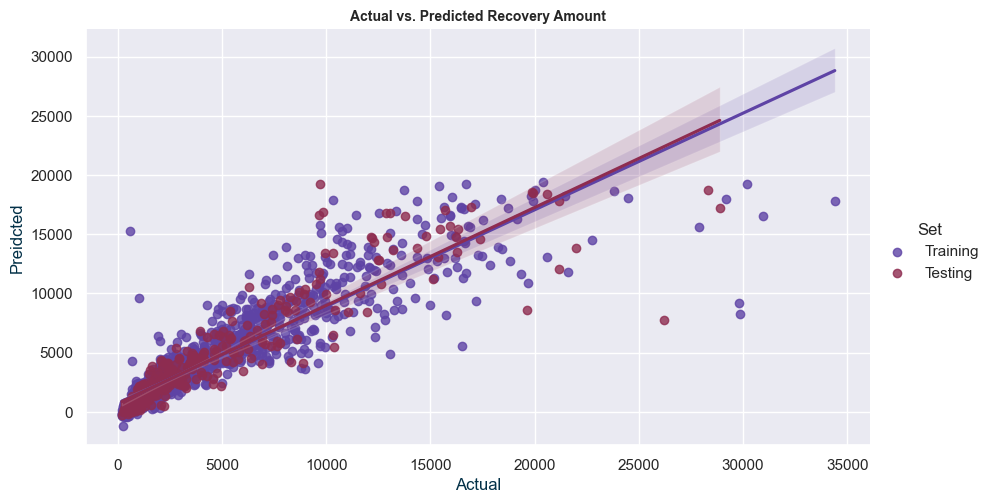

In [64]:
# Combining actual and predicted values with a 'Set' Identifier Training and Testing

train_results_lnr = pd.DataFrame({'Actual': ytrain, 'Predicted': train_pred_lnr, 'Set': 'Training'})
test_results_lnr = pd.DataFrame({'Actual': ytest, 'Predicted': test_pred_lnr, 'Set': 'Testing'})
result_lnr = pd.concat([train_results_lnr, test_results_lnr])

sns.lmplot(x='Actual', y='Predicted', data=result_lnr, hue='Set', palette='twilight', height=5, aspect=1.8)

plt.title('Actual vs. Predicted Recovery Amount', fontdict={'weight': 'bold', 'fontsize': 10})
plt.xlabel("Actual", fontdict={'color': '#023047'})
plt.ylabel("Preidcted", fontdict={'color': '#023047'})

sns.set(style='darkgrid')
plt.show()



In [71]:
# Importing PolynomialFeatures for feature transformation

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

# Transforming features for both training and testing sets
xtrain_poly = poly.fit_transform(xtrain)
xtest_poly = poly.fit_transform(xtest)

# Initializing and training a Linear Regression model on the Polynomial Features
model_lnr_pl = LinearRegression()
model_lnr_pl.fit(xtrain_poly, ytrain)

# Making predictions on the training and testing sets
train_pred_lnr_p = model_lnr_pl.predict(xtrain_poly)
test_pred_lnr_p = model_lnr_pl.predict(xtest_poly)

# Evaluate the Model
mae_train_lnr_p = metrics.mean_absolute_error(ytrain, train_pred_lnr_p)
mae_test_lnr_p = metrics.mean_absolute_error(ytest, test_pred_lnr_p)

mse_train_lnr_p = metrics.mean_squared_error(ytrain, train_pred_lnr_p)
mse_test_lnr_p = metrics.mean_squared_error(ytest, test_pred_lnr_p)

r2_train_lnr_p = metrics.r2_score(ytrain, train_pred_lnr_p)
r2_test_lnr_p = metrics.r2_score(ytest, test_pred_lnr_p)

print('Model Evaluation on Training set\n')
print(f'The Mean Absolute Error : {mae_train_lnr_p}')
print(f'The Mean Square Error : {mse_train_lnr_p}')
print(f'The R2 Score : {r2_train_lnr_p}\n')

print('Model Evaluation on Testing set\n')
print(f'The Mean Absolute Error : {mae_test_lnr_p}')
print(f'The Mean Square Error : {mse_test_lnr_p}')
print(f'The R2 Score : {r2_test_lnr_p}')


Model Evaluation on Training set

The Mean Absolute Error : 953.6870390788131
The Mean Square Error : 3575479.6875127046
The R2 Score : 0.8227356045055693

Model Evaluation on Testing set

The Mean Absolute Error : 1023.5630853787582
The Mean Square Error : 4523661.145830851
The R2 Score : 0.8111042505892445


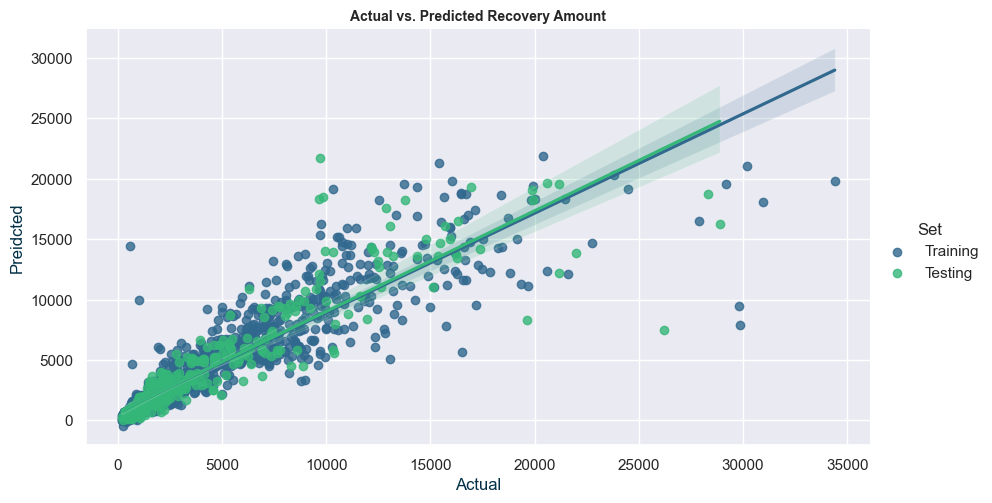

In [72]:
# Combining actual and predicted values with a 'Set' Identifier Training and Testing

train_results_lnr_p = pd.DataFrame({'Actual': ytrain, 'Predicted': train_pred_lnr_p, 'Set': 'Training'})
test_results_lnr_p = pd.DataFrame({'Actual': ytest, 'Predicted': test_pred_lnr_p, 'Set': 'Testing'})
result_lnr_p = pd.concat([train_results_lnr_p, test_results_lnr_p])

sns.lmplot(x='Actual', y='Predicted', data=result_lnr_p, hue='Set', palette='viridis', height=5, aspect=1.8)

plt.title('Actual vs. Predicted Recovery Amount', fontdict={'weight': 'bold', 'fontsize': 10})
plt.xlabel("Actual", fontdict={'color': '#023047'})
plt.ylabel("Preidcted", fontdict={'color': '#023047'})

sns.set(style='darkgrid')
plt.show()



### **Decision Tree Regressor**

In [96]:
# Initializeing a Decision Tree Regressor model
model_dt = DecisionTreeRegressor(random_state=4)

# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 8]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model_dt, param_grid=param_grid, cv=5, scoring='r2')

# Fit the model to the data
grid_search.fit(xtrain, ytrain)

# Get the best model
best_model_dt = grid_search.best_estimator_

best_model_dt.fit(xtrain, ytrain)

# Making the prediction
train_pred_dt = best_model_dt.predict(xtrain)
test_pred_dt = best_model_dt.predict(xtest)

# Evaluate the Model
mae_train_lnr = metrics.mean_absolute_error(ytrain, train_pred_dt)
mae_test_lnr = metrics.mean_absolute_error(ytest, test_pred_dt)

mse_train_lnr = metrics.mean_squared_error(ytrain, train_pred_dt)
mse_test_lnr = metrics.mean_squared_error(ytest, test_pred_dt)

r2_train_lnr = metrics.r2_score(ytrain, train_pred_dt)
r2_test_lnr = metrics.r2_score(ytest, test_pred_dt)

print(best_model_dt)

print('Model Evaluation on Training set\n')
print(f'The Mean Absolute Error : {mae_train_lnr}')
print(f'The Mean Square Error : {mse_train_lnr}')
print(f'The R2 Score : {r2_train_lnr}\n')

print('Model Evaluation on Testing set\n')
print(f'The Mean Absolute Error : {mae_test_lnr}')
print(f'The Mean Square Error : {mse_test_lnr}')
print(f'The R2 Score : {r2_test_lnr}')


DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, random_state=4)
Model Evaluation on Training set

The Mean Absolute Error : 893.5401190029097
The Mean Square Error : 3035513.0951502314
The R2 Score : 0.8495059570030568

Model Evaluation on Testing set

The Mean Absolute Error : 1084.9239176848878
The Mean Square Error : 5997786.177271118
The R2 Score : 0.7495488105236912


### **GradientBoosting Regressor**

In [51]:

model_gb = GradientBoostingRegressor(random_state=4)

# Define the parameter grid for search
param_grid = {
    'n_estimators': [150, 200],
    'max_depth': [2, 5, 7, 10]
}

# Create the GridSearchCV object
grid_search_gb = GridSearchCV(estimator=model_gb, param_grid=param_grid)

# Fit the GridSearch to the data
grid_search_gb.fit(xtrain, ytrain)

# Get the best model
best_model_gb = grid_search_gb.best_estimator_

# Make the prediction
train_pred_gb = best_model_gb.predict(xtrain)
test_pred_gb = best_model_gb.predict(xtest)

best_model_gb

GradientBoostingRegressor(max_depth=2, n_estimators=150, random_state=4)

In [52]:
# Evaluate the Model
mae_train_gb = metrics.mean_absolute_error(ytrain, train_pred_gb)
mae_test_gb = metrics.mean_absolute_error(ytest, test_pred_gb)

mse_train_gb = metrics.mean_squared_error(ytrain, train_pred_gb)
mse_test_gb = metrics.mean_squared_error(ytest, test_pred_gb)

r2_train_gb = metrics.r2_score(ytrain, train_pred_gb)
r2_test_gb = metrics.r2_score(ytest, test_pred_gb)

print('Model Evaluation on Training set\n')
print(f'The Mean Absolute Error : {mae_train_gb}')
print(f'The Mean Square Error : {mse_train_gb}')
print(f'The R2 Score : {r2_train_gb}\n')

print('Model Evaluation on Testing set\n')
print(f'The Mean Absolute Error : {mae_test_gb}')
print(f'The Mean Square Error : {mse_test_gb}')
print(f'The R2 Score : {r2_test_gb}')

Model Evaluation on Training set

The Mean Absolute Error : 811.9336472756604
The Mean Square Error : 2296985.8378609805
The R2 Score : 0.8861205092481039

Model Evaluation on Testing set

The Mean Absolute Error : 1022.6496842485974
The Mean Square Error : 4943060.517446874
The R2 Score : 0.7935912769049042


### **Regression modeling: Adding true threshold**

In [18]:

Y = df['expected_recovery_amount']

# Creating a binary variable indicating whether the expected recovery amount is above the threshold 
threshold_indicator = (Y > 1000).astype(int)

threshold_indicator = pd.DataFrame({'Threshold_indicator': threshold_indicator})

# Adding the binary variable to the input features
x_with_threshold = pd.concat([x, threshold_indicator], axis=1)

# Splitting the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x_with_threshold, Y, test_size=0.2, random_state=4)

# Build and train the linear Regression model with the threshold indicator
model_with_threshold = LinearRegression()

model_with_threshold.fit(xtrain, ytrain)

# Make the predictions on the training & test set
train_pred = model_with_threshold.predict(xtrain)
test_pred = model_with_threshold.predict(xtest)


In [19]:
# Evaluate the Model
mae_train_tr = metrics.mean_absolute_error(ytrain, train_pred)
mae_test_tr = metrics.mean_absolute_error(ytest, test_pred)

mse_train_tr = metrics.mean_squared_error(ytrain, train_pred)
mse_test_tr = metrics.mean_squared_error(ytest, test_pred)

r2_train_tr = metrics.r2_score(ytrain, train_pred)
r2_test_tr = metrics.r2_score(ytest, test_pred)

print('Model Evaluation on Training set\n')
print(f'The Mean Absolute Error : {mae_train_tr}')
print(f'The Mean Square Error : {mse_train_tr}')
print(f'The R2 Score : {r2_train_tr}\n')

print('Model Evaluation on Testing set\n')
print(f'The Mean Absolute Error : {mae_test_tr}')
print(f'The Mean Square Error : {mse_test_tr}')
print(f'The R2 Score : {r2_test_tr}')

Model Evaluation on Training set

The Mean Absolute Error : 1.4420665473854355e-12
The Mean Square Error : 3.488022027899232e-24
The R2 Score : 1.0

Model Evaluation on Testing set

The Mean Absolute Error : 1.5367324271335684e-12
The Mean Square Error : 4.21591962235146e-24
The R2 Score : 1.0


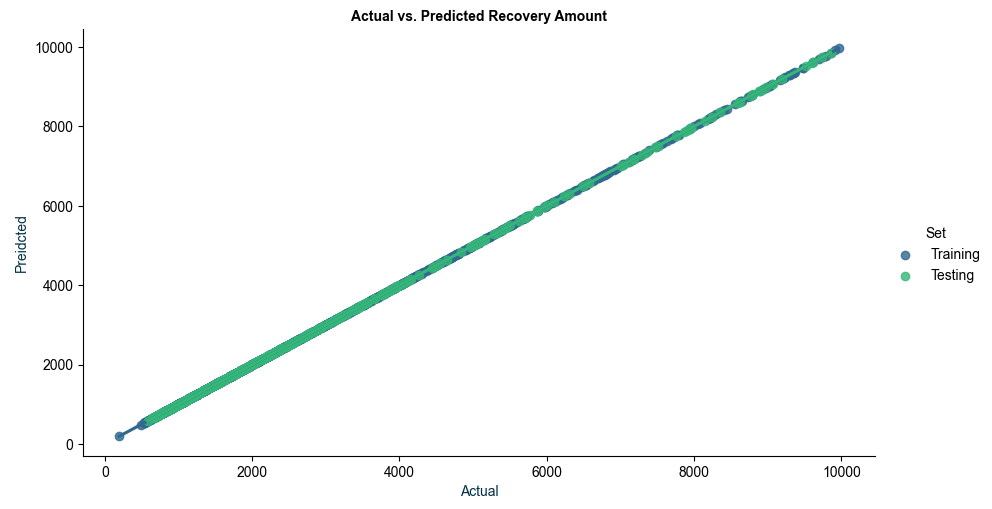

In [20]:
# Combining actual and predicted values with a 'Set' Identifier Training and Testing

train_results_tr = pd.DataFrame({'Actual': ytrain, 'Predicted': train_pred, 'Set': 'Training'})
test_results_tr = pd.DataFrame({'Actual': ytest, 'Predicted': test_pred, 'Set': 'Testing'})
result_tr = pd.concat([train_results_tr, test_results_tr])

sns.lmplot(x='Actual', y='Predicted', data=result_tr, hue='Set', palette='viridis', height=5, aspect=1.8)

plt.title('Actual vs. Predicted Recovery Amount', fontdict={'weight': 'bold', 'fontsize': 10})
plt.xlabel("Actual", fontdict={'color': '#023047'})
plt.ylabel("Preidcted", fontdict={'color': '#023047'})

sns.set(style='darkgrid')
plt.show()



### **Regression modeling: no threshold**

In [27]:
# Scenario: Analyzing the relationship between expected recovery amount and actual recovery amount
# for a specific window of expected recovery amounts (900 to 1100).

import statsmodels.api as sm

# Filtering the dataset for the specified window of expected recovery amounts
df_fil = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] < 1100)]

# Defining independent variable (X) and dependent variable (y)
x = df_fil['expected_recovery_amount']
y = df_fil['actual_recovery_amount']

# Adding a constant term to the independent variable
X = sm.add_constant(x)

# Creating and fitting the multiple linear regression model
model = sm.OLS(y, X).fit()

# Making predictions using the model
predictions = model.predict(X)

# Displaying the summary of the regression analysis
print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     63.78
Date:                    Fri, 19 Jan 2024   Prob (F-statistic):           1.56e-13
Time:                            10:46:40   Log-Likelihood:                -1278.9
No. Observations:                     183   AIC:                             2562.
Df Residuals:                         181   BIC:                             2568.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

### **Regression modeling: Adding true threshold**

In [28]:
# Creating a binary column 'above_threshold' based on the condition
df['above_threshold'] = np.where(df['expected_recovery_amount'] >= 1000, 1, 0)

# Specifying the lower and upper bounds of the expected recovery amount window
lower_window = 900
upport_window = 1100

# Filtering the dataset for the specified window of expected recovery amounts
new_df = df[(df['expected_recovery_amount'] >= lower_window) & (df['expected_recovery_amount'] <= upport_window)]

# Defining independent variables (X) and dependent variable (y)
x = new_df[['expected_recovery_amount', 'above_threshold']]
y = new_df['actual_recovery_amount']

# Adding a constant term to the independent variables
X = sm.add_constant(x)

# Creating and fitting the multiple linear regression model
model = sm.OLS(y, X).fit()

# Making predictions using the model
predictions = model.predict(X)

# Displaying the summary of the regression analysis
print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.309
Model:                                OLS   Adj. R-squared:                  0.301
Method:                     Least Squares   F-statistic:                     40.43
Date:                    Fri, 19 Jan 2024   Prob (F-statistic):           3.06e-15
Time:                            10:52:47   Log-Likelihood:                -1279.3
No. Observations:                     184   AIC:                             2565.
Df Residuals:                         181   BIC:                             2574.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

### **Regression modeling: Adjusting the window**

In [37]:

df_fil = df.loc[(df['expected_recovery_amount'] >= 950) & (df['expected_recovery_amount'] < 1050)]

df_fil['indicator'] = (df_fil['expected_recovery_amount'] >= 100).astype(int)

x = df_fil[['expected_recovery_amount', 'indicator']]
y = df_fil['actual_recovery_amount']
X = sm.add_constant(x)

model = sm.OLS(y, X).fit()

print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.234
Model:                                OLS   Adj. R-squared:                  0.226
Method:                     Least Squares   F-statistic:                     29.64
Date:                    Fri, 19 Jan 2024   Prob (F-statistic):           3.92e-07
Time:                            11:02:09   Log-Likelihood:                -696.22
No. Observations:                      99   AIC:                             1396.
Df Residuals:                          97   BIC:                             1402.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [42]:
# Creating a binary column 'above_threshold' based on the condition
df['above_threshold'] = np.where(df['expected_recovery_amount'] >= 1000, 1, 0)

# Specifying the lower and upper bounds of the expected recovery amount window
lower_window = 900
upport_window = 1100

# Filtering the dataset for the specified window of expected recovery amounts
new_df = df[(df['expected_recovery_amount'] >= lower_window) & (df['expected_recovery_amount'] <= upport_window)]

# Defining independent variables (X) and dependent variable (y)
x1 = new_df[['expected_recovery_amount', 'above_threshold']]
y1 = new_df['actual_recovery_amount']

# Adding a constant term to the independent variables
X1 = sm.add_constant(x1)

# Creating and fitting the multiple linear regression model
model = sm.OLS(y1, X1).fit()

# Get the regression coefficient for the true threshold in the first window
coeff_1 = model.params['above_threshold']

#---------------------------
# Defining the second window

# Specifying the lower and upper bounds of the expected recovery amount window
lower_window2 = 950
upport_window2 = 1050

# Filtering the dataset for the specified window of expected recovery amounts
new_df = df[(df['expected_recovery_amount'] >= lower_window2) & (df['expected_recovery_amount'] <= upport_window2)]

# Defining independent variables (X) and dependent variable (y)
x2 = new_df[['expected_recovery_amount', 'above_threshold']]
y2 = new_df['actual_recovery_amount']

# Adding a constant term to the independent variables
X2 = sm.add_constant(x2)

# Creating and fitting the multiple linear regression model
model2 = sm.OLS(y2, X2).fit()

# Get the regression coefficient for the true threshold in the first window
coeff_2 = model2.params['above_threshold']

print(f'Coefficient for the window $900-$1000: {coeff_1}\nCoefficient for the window $950-$1050: {coeff_2}')


Coefficient for the window $900-$1000: 284.02963304899566
Coefficient for the window $950-$1050: 285.51597966538446


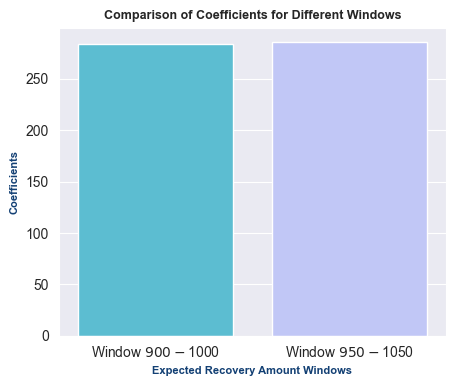

In [50]:
# Visualizing the 
plt.figure(figsize=(5,4))

sns.barplot(x=['Window $900-$1000', 'Window $950-$1050'], y=[coeff_1, coeff_2], palette=['#48cae4', '#b8c0ff'])

plt.title('Comparison of Coefficients for Different Windows', fontdict={'fontsize' : 9, 'weight' : 'bold'})
plt.xlabel('Expected Recovery Amount Windows', fontdict={'weight': 'bold', 'fontsize': 8, 'color': '#134074'})
plt.ylabel('Coefficients', fontdict={'weight': 'bold', 'fontsize': 8, 'color': '#134074'})

plt.show()

## **Conclusion**

*After an in-depth analysis of the data, the focus was on determining the effectiveness of the higher recovery strategy for different windows of expected recovery amounts. Specifically, we compared the coefficients for the two windows, $900-$1000 and $950-$1050, to understand the impact of the strategy on actual recovery amounts.*

*The results indicate that the coefficient for the window $950-$1050 (285.52) is slightly higher than that for the window $900-$1000 (284.03). This suggests that, on average, customers within the $950-$1050 window tend to have a slightly higher actual recovery amount compared to those in the $900-$1000 window.*

*In conclusion, the analysis supports the effectiveness of the higher recovery strategy, and its application can be considered beneficial within the specified expected recovery amount windows.*